# Website Traffic Analyse

Eine explorative Untersuchung des Website-Traffics, Nutzerverhaltens und Engagement-Metriken.

## Datensatz
- **Name:** Website Traffic Dataset
- **Beschreibung:** Detaillierte Informationen zum Website-Traffic, inklusive Seitenaufrufen, Sitzungsdauer, Absprungrate, Traffic-Quellen, Verweildauer, vorherigen Besuchen und Conversion-Rate.
- **Quelle:** [Kaggle – Website Traffic Dataset](https://www.kaggle.com/datasets/anthonytherrien/website-traffic/data)
- **Lizenz:** Öffentlich/frei verfügbar

| Feld              | Beschreibung                                                                                   |
| ----------------- | ---------------------------------------------------------------------------------------------- |
| Page Views        | Anzahl der Seiten, die während einer Sitzung aufgerufen wurden                                 |
| Session Duration  | Gesamtdauer der Sitzung in Minuten                                                            |
| Bounce Rate       | Prozentsatz der Besucher, die die Seite nach nur einer angesehenen Seite verlassen             |
| Traffic Source    | Herkunft des Traffics (z. B. Organic, Social, Paid)                                           |
| Time on Page      | Zeit, die auf einer bestimmten Seite verbracht wurde                                           |
| Previous Visits   | Anzahl der vorherigen Besuche desselben Besuchers                                             |
| Conversion Rate   | Prozentsatz der Besucher, die eine gewünschte Aktion abgeschlossen haben (z. B. Kauf, Registrierung) |

## Datenübersicht
- **Gesamtanzahl der Datensätze:** 2000
- **Anzahl der Features:** 7

## Nutzungsmöglichkeiten

Dieser Datensatz kann für verschiedene Analysen verwendet werden, z. B.:

- Identifizierung der wichtigsten Faktoren für Engagement und Conversion
- Analyse der Effektivität verschiedener Traffic-Quellen
- Verständnis von Nutzerverhalten und Optimierung der Website
- Verbesserung von Marketing-Strategien basierend auf der Performance der Traffic-Quellen
- Verbesserung der Nutzererfahrung durch Analyse der Verweildauer auf unterschiedlichen Seiten


## Setup & Import
- pandas & numpy: Datenstruktur & Berechnungen
- matplotlib & seaborn: Visualisierung
- sklearn: Machine Learning (Vorbereitung, Modellierung, Clusteranalyse)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

## Datenimport

In [10]:
# Datensatz laden
df = pd.read_csv('/Users/janka-katharinaschultze/git/data-analytics-portfolio-2/WebTrafficDashboards/website_wata.csv')
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


### Data Profiling

In [11]:
# Überblick Datensatz
print("Datensatz Überblick")
print(df.info())
print("\nStatistische Kennzahlen")
print(df.describe())
print("\nAnzahl eindeutiger Werte")
print(df.nunique())
print("\nFehlende Werte")
print(df.isna().sum())
print("\nDuplikate")
print(df[df.duplicated()].shape[0])
print("\nForm des Datensatzes:", df.shape)

Datensatz Überblick
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB
None

Statistische Kennzahlen
        Page Views  Session Duration  Bounce Rate  Time on Page  \
count  2000.000000       2000.000000  2000.000000   2000.000000   
mean      4.950500          3.022045     0.284767      4.027439   
std       2.183903          3.104518     0.159781      2.887422   
min       0.000000          0.003613     0.007868      0.068515   
25%       3.000000    

### Datenbereinigung: Unrealistische Conversion Rate

Bei der explorativen Analyse zeigt sich, dass die Variable **Conversion Rate** nahezu konstant bei 1.0 liegt
(Durchschnitt ≈ 98 %). Ein solches Niveau ist im realen Web-Traffic nicht plausibel und deutet auf eine
vereinfachte bzw. fehlerhafte Generierung der Zielvariable hin.

Um dennoch realistische Analysen durchführen zu können, wird die ursprüngliche Conversion Rate nicht gelöscht,
sondern um eine neu generierte, realistischere Conversion Rate ergänzt. Zusätzlich wird eine neue erklärende
Variable eingeführt, die den Besuchertyp(neu vs. wiederkehrend) abbildet.


In [44]:
# Reproduzierbarkeit sicherstellen
np.random.seed(42)

# Besuchertyp: 60 % neue Besucher, 40 % wiederkehrende Besucher
df['Besuchertyp'] = np.random.choice(
    ['Neu', 'Wiederkehrend'],
    size=len(df),
    p=[0.6, 0.4]
)

# Funktion zur Generierung realistischer Conversion Rates
def conv_rate(row):
    if row['Besuchertyp'] == 'Neu':
        # Neue Besucher: ca. 0,2 % – 1 %
        return np.round(np.random.uniform(0.002, 0.01), 4)
    else:
        # Wiederkehrende Besucher: ca. 1,5 % – 5 %
        return np.round(np.random.uniform(0.015, 0.05), 4)

# Neue realistische Conversion Rate erzeugen
df['ConversionRate_real'] = df.apply(conv_rate, axis=1)

df[['Besuchertyp', 'Conversion Rate', 'ConversionRate_real']].head()


,Besuchertyp,Conversion Rate,ConversionRate_real
0,Neu,1.0,0.0041
1,Wiederkehrend,1.0,0.0236
2,Wiederkehrend,1.0,0.0467
3,Neu,1.0,0.0040
4,Neu,1.0,0.0042


Für alle weiteren Analysen wird primär die Variable **ConversionRate_real** verwendet,
da sie realistischere Werte abbildet und Unterschiede zwischen Besuchergruppen zulässt.
Die ursprüngliche Conversion Rate bleibt zu Dokumentationszwecken im Datensatz erhalten.

## Explorative Analyse (EDA)

In [13]:
# Überblick über Traffic - KPIs
# Gesamtseitenaufrufe, durchschnittliche Sitzungsdauer, durchschnittliche Bounce Rate
total_pageviews = df['Page Views'].sum()
avg_session_duration = df['Session Duration'].mean()
avg_bounce_rate = df['Bounce Rate'].mean()
avg_time_on_page = df['Time on Page'].mean()
avg_previous_visits = df['Previous Visits'].mean()
avg_conversion_rate = df['ConversionRate_real'].mean()

print(f"Gesamtseitenaufrufe: {total_pageviews}")
print(f"Durchschnittliche Sitzungsdauer: {avg_session_duration:.2f} min")
print(f"Durchschnittliche Bounce Rate: {avg_bounce_rate * 100:.0f}%")
print(f"Durchschnittliche Verweildauer: {avg_time_on_page:.2f} min")
print(f"Durchschnittliche Anzahl vorheriger Besuche: {avg_previous_visits:.2f}")
print(f"Durchschnittliche Conversion Rate: {avg_conversion_rate * 100:.2f}%")

Gesamtseitenaufrufe: 9901
Durchschnittliche Sitzungsdauer: 3.02 min
Durchschnittliche Bounce Rate: 28%
Durchschnittliche Verweildauer: 4.03 min
Durchschnittliche Anzahl vorheriger Besuche: 1.98
Durchschnittliche Conversion Rate: 1.68%


In [14]:
# Verteilung Traffic-Quellen
traffic_counts = df['Traffic Source'].value_counts().reset_index(name="Anzahl")
print(traffic_counts)

  Traffic Source  Anzahl
0        Organic     786
1           Paid     428
2       Referral     301
3         Social     269
4         Direct     216


In [15]:
# Conversion Rate nach Besuchertyp
df.groupby('Besuchertyp')['ConversionRate_real'].mean() * 100

Besuchertyp
Neu              0.596881
Wiederkehrend    3.239070
Name: ConversionRate_real, dtype: float64

In [17]:
# Conversion Rate nach Traffic-Quelle
df.groupby('Traffic Source')['ConversionRate_real'].mean().sort_values(ascending=False) * 100

Traffic Source
Direct      1.783148
Referral    1.757475
Paid        1.709136
Organic     1.649300
Social      1.525688
Name: ConversionRate_real, dtype: float64

## Visualisierung

Text(0, 0.5, 'Sessions')

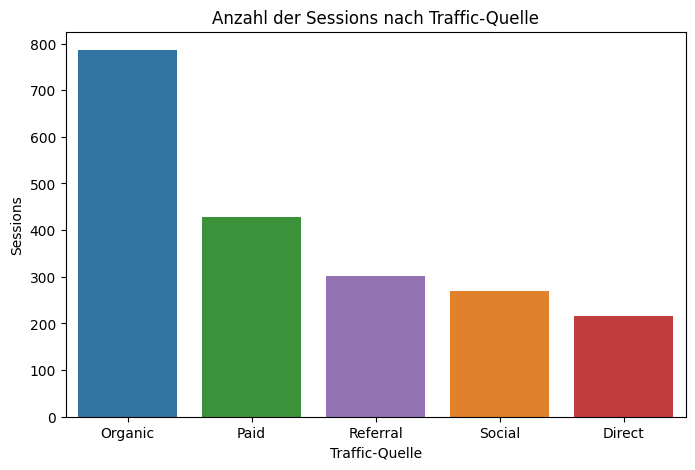

In [18]:
# Häufigkeitsdiagramm für die Traffic-Quelle
plt.figure(figsize=(8,5))
sns.countplot(x="Traffic Source",data=df, order=df['Traffic Source'].value_counts().index, hue= "Traffic Source")
plt.title("Anzahl der Sessions nach Traffic-Quelle")
plt.xlabel("Traffic-Quelle")
plt.ylabel("Sessions")

Text(0.5, 1.0, 'Anteile der Traffic-Quellen')

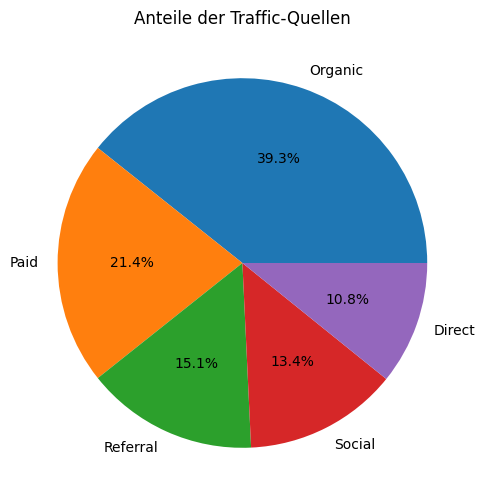

In [19]:
# Kreisdiagramm der Traffic-Quellen
df["Traffic Source"].value_counts().plot(
    kind = "pie", autopct = "%.1f%%",
    figsize=(6,6))
plt.ylabel(None)
plt.title("Anteile der Traffic-Quellen")

Text(0, 0.5, 'Conversion Rate')

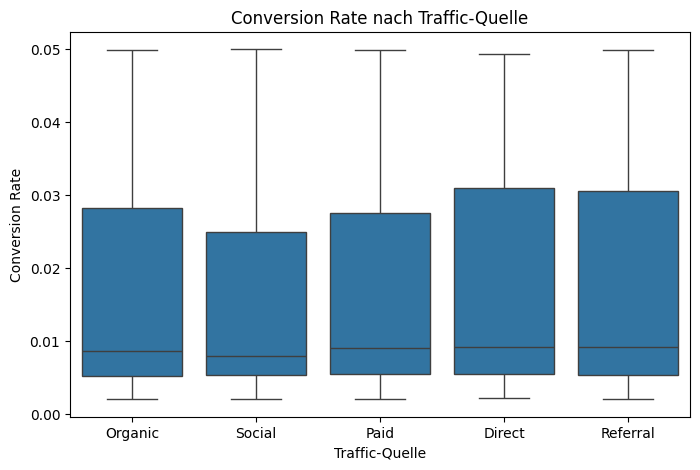

In [16]:
# Conversion Rate nach Traffic-Quelle
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Traffic Source", y="ConversionRate_real")
plt.title("Conversion Rate nach Traffic-Quelle")
plt.xlabel("Traffic-Quelle")
plt.ylabel("Conversion Rate")

Text(0.5, 0, 'Seitenaufrufe')

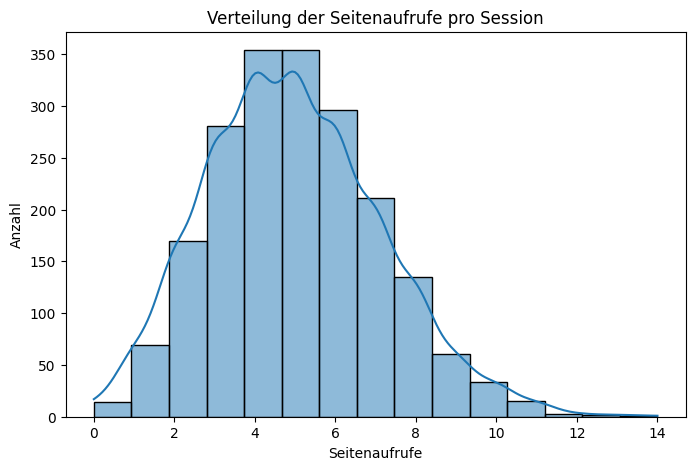

In [20]:
# Histogramm für die Verteilung der Seitenaufrufe
plt.figure(figsize=(8,5))
sns.histplot(data = df, x = "Page Views", kde = True, bins = 15)
plt.title("Verteilung der Seitenaufrufe pro Session")
plt.ylabel("Anzahl")
plt.xlabel("Seitenaufrufe")

Text(0, 0.5, 'Conversion Rate')

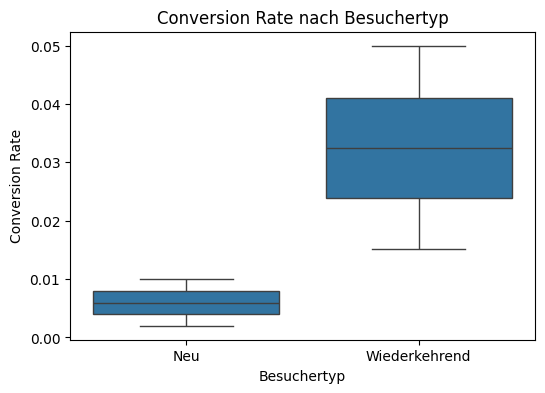

In [21]:
# Conversion Rate nach Besuchertyp
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Besuchertyp", y="ConversionRate_real")
plt.title("Conversion Rate nach Besuchertyp")
plt.xlabel("Besuchertyp")
plt.ylabel("Conversion Rate")


Text(0, 0.5, 'Verweildauer')

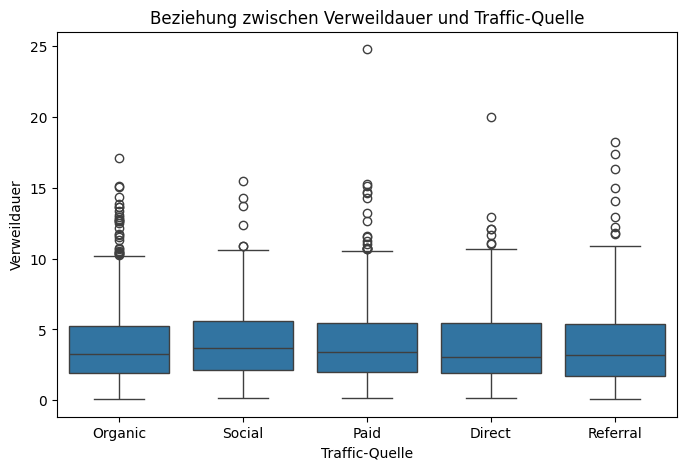

In [22]:
# Boxplot für Verweildauer und Traffic-Quelle
plt.figure(figsize=(8,5))
sns.boxplot(data= df, x="Traffic Source", y="Time on Page")
plt.title("Beziehung zwischen Verweildauer und Traffic-Quelle")
plt.xlabel("Traffic-Quelle")
plt.ylabel("Verweildauer")

In [45]:
df_num = df.drop(['Traffic Source', 'Conversion Rate','Besuchertyp'], axis=1)

In [46]:
df_num.dtypes

Page Views               int64
Session Duration       float64
Bounce Rate            float64
Time on Page           float64
Previous Visits          int64
ConversionRate_real    float64
dtype: object

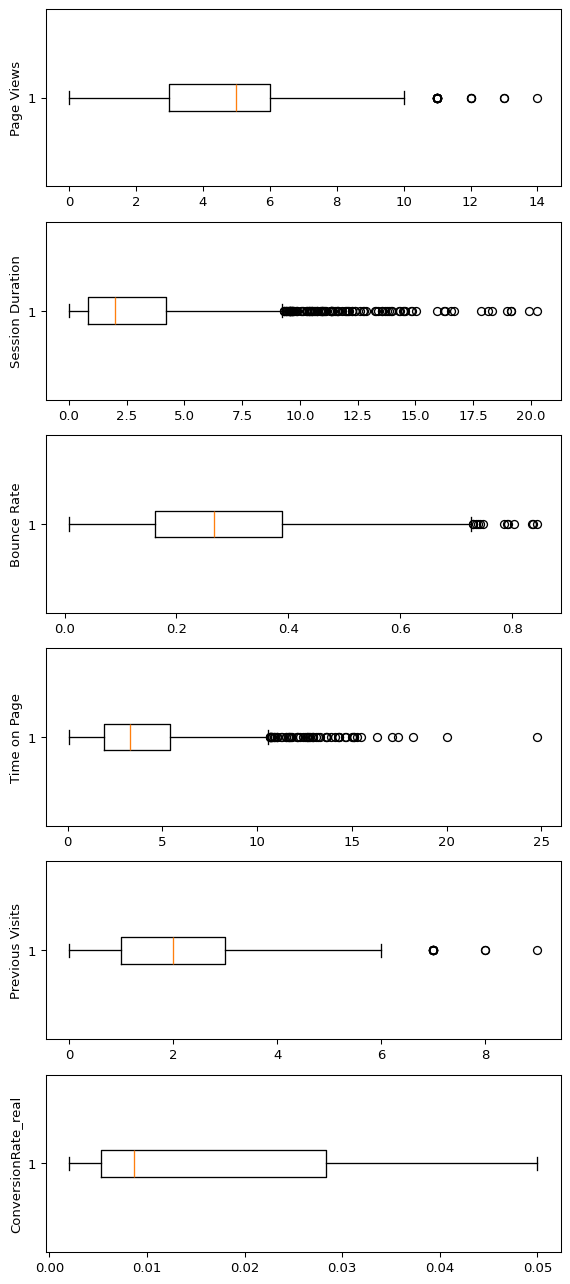

In [47]:
# Übersicht Boxplots aus numerischen Variablen erstellen
fig, axs = plt.subplots(6,1,dpi=95, figsize=(7,17))
i = 0
for col in df_num.columns:
	axs[i].boxplot(df_num[col], vert=False)
	axs[i].set_ylabel(col)
	i+=1

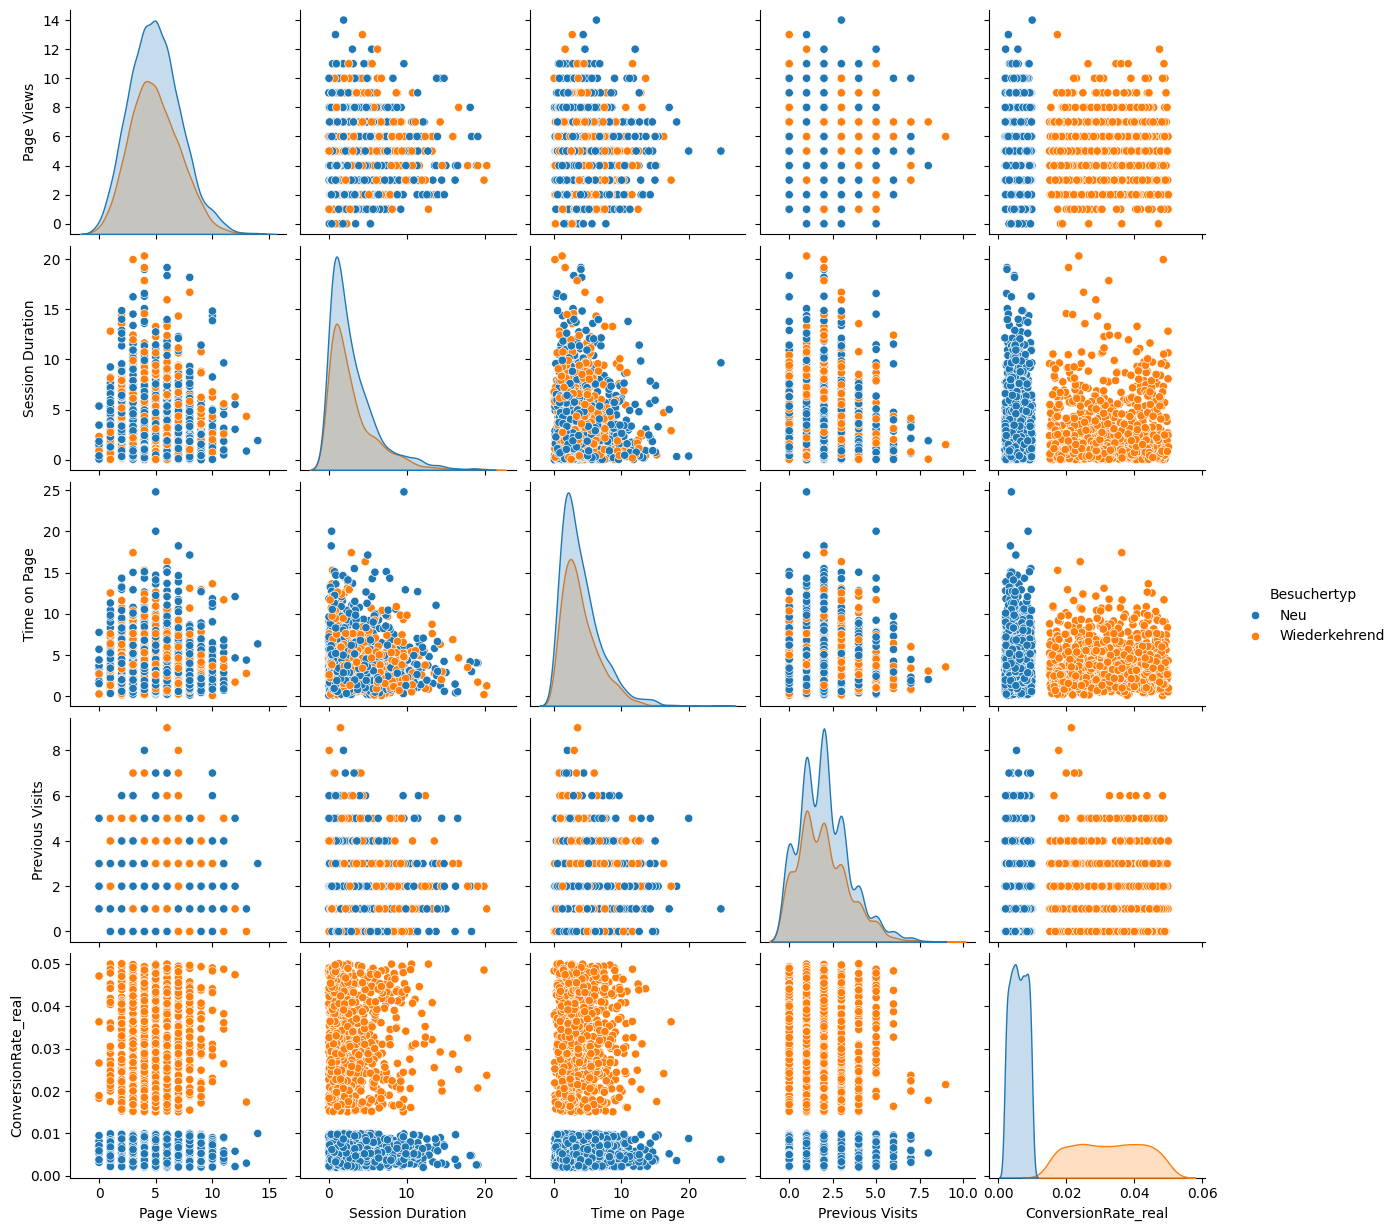

In [35]:
# Überblick über Beziehungen und Verteilungen
sns.pairplot(
    df,
    vars=['Page Views', 'Session Duration', 'Time on Page',
          'Previous Visits', 'ConversionRate_real'],
    hue='Besuchertyp'
)

Text(0.5, 1.0, 'Korrelationsmatrix')

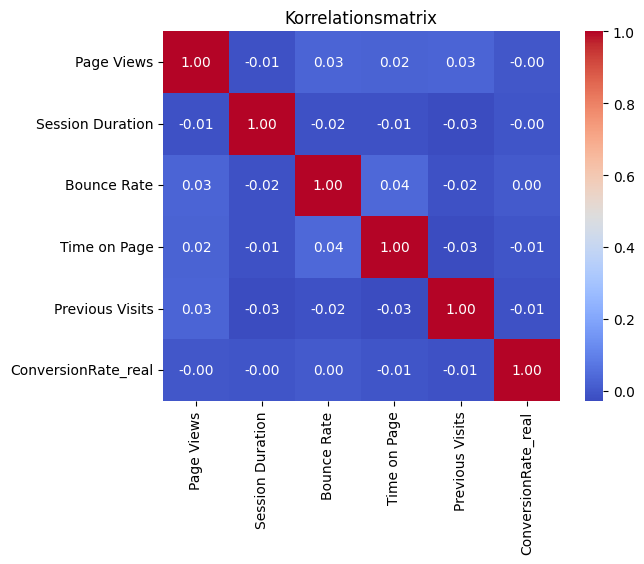

In [49]:
# Heatmap für Korrelationen
corr = df_num.corr()

plt.figure(dpi=100)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Korrelationsmatrix")

## Zusammenfassung und Erkenntnisse

1. Die stärkste Quelle des Traffics ist organische Suche: Der überwiegende Teil der Nutzer erreicht die Website über Suchmaschinen.
Dies zeigt, dass Inhalte grundsätzlich über Suchbegriffe auffindbar sind und SEO derzeit der wichtigste Kanaleinstieg ist.
Strategisch bedeutet das: Suchmaschinenoptimierung ist der zentrale Hebel für Reichweite.

2. Direkter Traffic ist am geringsten ausgeprägt: Der kleinste Anteil der Sitzungen erfolgt über den Direktzugang.
Das spricht dafür, dass die Marke oder Domain nicht stark als „Anlaufadresse“ verankert ist oder dass Wiederkehrraten gering sind.
Redaktionen können hier ansetzen, indem sie Newsletter, Direktzugriffe über Apps oder interne Verlinkungsstrategien stärken.

3. Die ursprünglich enthaltene Conversion Rate erwies sich als unrealistisch, da sie nahezu konstant bei 1.0 lag.
Durch die Einführung einer realistisch generierten Conversion Rate sowie der zusätzlichen Variable Besuchertyp
konnten plausible Unterschiede im Nutzerverhalten sichtbar gemacht werden.
Insbesondere zeigen wiederkehrende Besucher deutlich höhere Conversion Rates, was gängigen Erkenntnissen aus dem
Web-Analytics-Umfeld entspricht. Die Analyse ermöglicht damit erstmals belastbare Interpretationen.

4. Zwischen den Nutzungsmetriken bestehen keine statistisch relevanten Zusammenhänge: Obwohl man typischerweise Beziehungen erwarten würde – etwa längere Sitzungen bei mehr Page Views oder geringere Bounce Rate bei steigender Verweildauer, zeigen die Korrelationen nahezu keinen Zusammenhang.
Der Datensatz spiegelt damit kein echtes Nutzerverhalten wider, sondern gleichmäßig generierte Daten.